 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [93]:
# Conduct initial imports

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [94]:
# Reading whale returns


csv_path = Path('../Downloads/whale_returns.csv')

whale_df = pd.read_csv(csv_path)

whale_df.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [95]:
 # Set the date as the index to the DataFrame

whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [96]:
#Drop extra 'Date' column 

whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [97]:
#Drop Duplicates

whale_df = whale_df.drop_duplicates()

In [98]:
# Count nulls

whale_df.count()

SOROS FUND MANAGEMENT LLC      1021
PAULSON & CO.INC.              1021
TIGER GLOBAL MANAGEMENT LLC    1021
BERKSHIRE HATHAWAY INC         1021
dtype: int64

In [99]:
# Drop nulls

whale_df.isnull().mean() * 100



SOROS FUND MANAGEMENT LLC      0.097847
PAULSON & CO.INC.              0.097847
TIGER GLOBAL MANAGEMENT LLC    0.097847
BERKSHIRE HATHAWAY INC         0.097847
dtype: float64

In [100]:
whale_df = whale_df.dropna().copy()

In [101]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [102]:
whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [103]:
 # Calculate daily returns
 
whale_daily_returns = whale_df.pct_change()
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [104]:
# Reading algorithmic returns

csv_path = Path('../Downloads/algo_returns.csv')

algo_df = pd.read_csv(csv_path)

algo_df.head(10)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
5,2014-06-04,-0.001838,NaN
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735


In [105]:
 # Set the date as the index to the DataFrame

algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [106]:
#Drop extra 'Date' column 

algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [107]:
# Count nulls

algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [108]:
# Drop nulls

algo_df = algo_df.dropna().copy()

In [109]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [110]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [111]:
# Calculate daily returns

algo_daily_returns = algo_df.pct_change()
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [112]:
# Reading S&P TSX 60 Closing Prices

csv_path = Path('../Downloads/sp_tsx_history.csv')

sp_df = pd.read_csv(csv_path)

sp_df.head(10)


,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
5,9-Oct-2012,"$12,273.57"
6,10-Oct-2012,"$12,212.42"
7,11-Oct-2012,"$12,233.95"
8,12-Oct-2012,"$12,202.04"
9,15-Oct-2012,"$12,229.96"


In [113]:
# Check Data Types

sp_df.dtypes

Date     object
Close    object
dtype: object

In [114]:
# Set the date as the index to the DataFrame

sp_df.set_index(pd.to_datetime(sp_df['Date'], infer_datetime_format=True), inplace=True)
sp_df.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,"$12,370.19"
2012-10-02,2-Oct-2012,"$12,391.23"
2012-10-03,3-Oct-2012,"$12,359.47"
2012-10-04,4-Oct-2012,"$12,447.68"
2012-10-05,5-Oct-2012,"$12,418.99"


In [115]:
#Drop the extra date column 

sp_df = sp_df.drop(columns=["Date"])
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [116]:
# Fix Data Types

#Clean data by replacing $

sp_df["Close"] = sp_df["Close"].str.replace("$", "")

sp_df["Close"].head(10)



<ipython-input-116-99c52f011607>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_df["Close"] = sp_df["Close"].str.replace("$", "")


Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
2012-10-09    12,273.57
2012-10-10    12,212.42
2012-10-11    12,233.95
2012-10-12    12,202.04
2012-10-15    12,229.96
Name: Close, dtype: object

In [117]:
#Clean data by replacing comma

sp_df["Close"] = sp_df["Close"].str.replace(",", "")

sp_df["Close"].head(10)

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
2012-10-09    12273.57
2012-10-10    12212.42
2012-10-11    12233.95
2012-10-12    12202.04
2012-10-15    12229.96
Name: Close, dtype: object

In [118]:
#Convert data to integer

sp_df.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [119]:
sp_df['Close'] = sp_df['Close'].astype(float)

sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [120]:
# Calculate daily returns

sp_daily_returns = sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [121]:
# Drop nulls

sp_df.isnull().mean() * 100



Close    0.0
dtype: float64

In [122]:
sp_df = sp_df.dropna().copy()

In [123]:
sp_df.isnull().sum()

Close    0
dtype: int64

In [124]:
sp_df.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [33]:
# Rename `Close` Column to be specific to this portfolio.

# Use the `rename` method to change the name of the columns
# need to changed dataframe to variable to persist the manipulation.
sp_df = sp_df.rename(columns={
    "Close": "Closing"
})

In [125]:
sp_df.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [126]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp_daily_returns], axis="columns", join="inner")

all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,-0.761929,-1.296713,-0.008530
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.003371
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001344
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.009972
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149,-0.376856,-19.155605,-0.000628
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302,3.368191,-1.725170,0.002254
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394,0.746958,-0.461657,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

In [36]:
## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

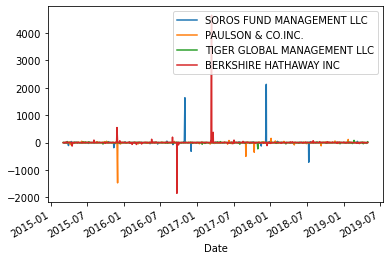

In [127]:
whale_daily_returns.plot()

<AxesSubplot:xlabel='Date'>

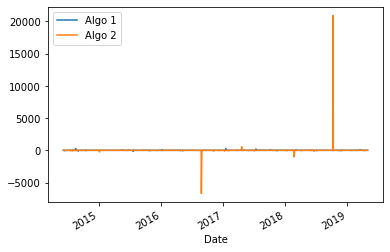

In [128]:
algo_daily_returns.plot()

<AxesSubplot:xlabel='Date'>

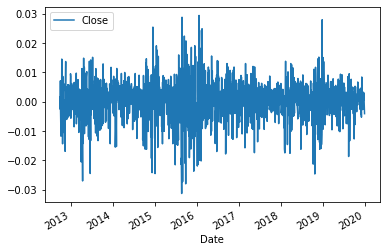

In [129]:
sp_daily_returns.plot()

<AxesSubplot:xlabel='Date'>

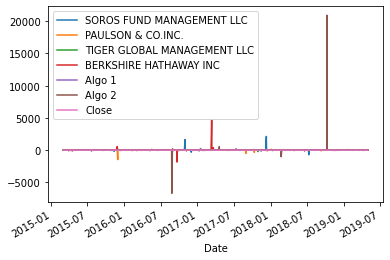

In [130]:
# Plot daily returns of all portfolios

all_returns.plot()




#### Calculate and Plot cumulative returns.

In [131]:
# Calculate cumulative returns of all portfolios

pd.Series([1,2,3,4]).prod()

# Plot cumulative returns


24

In [132]:
pd.Series([1,2,3,4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

---

In [133]:
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,0.238071,-0.296713,0.991470
2015-03-04,-1.762070,-0.650792,5.113646,-0.641381,1.052838,0.755065,0.988128
2015-03-05,-3.173432,-0.818399,-4.751772,-1.024002,0.117072,1.350985,0.989456
2015-03-06,6.246788,0.717603,17.115278,1.994020,0.607610,-3.581344,0.979589
2015-03-09,-0.460116,-0.848387,-11.790828,0.251566,0.667713,0.407256,0.973168


<AxesSubplot:xlabel='Date'>

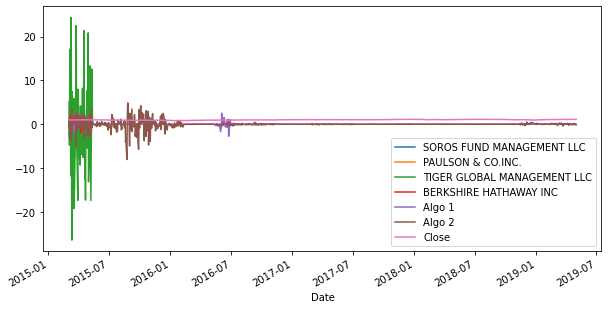

In [134]:
cumulative_returns.plot(figsize=(10,5))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

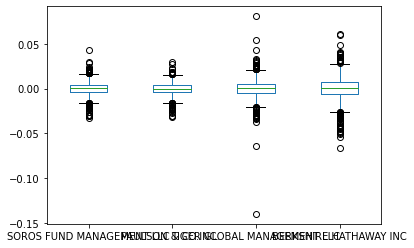

In [135]:
# Box plot to visually show risk

whale_df.plot.box()

<AxesSubplot:>

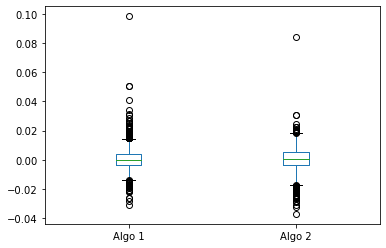

In [136]:
algo_df.plot.box()

<AxesSubplot:>

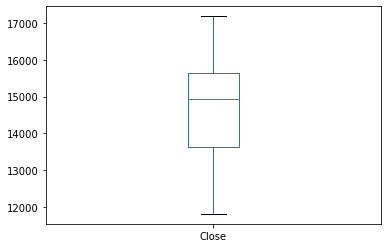

In [137]:
sp_df.plot.box()

### Calculate Standard Deviations

In [138]:
# Calculate the daily standard deviations of all portfolios

daily_std = whale_df.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007987
PAULSON & CO.INC.              0.007106
TIGER GLOBAL MANAGEMENT LLC    0.011024
BERKSHIRE HATHAWAY INC         0.013067
dtype: float64

In [139]:
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840


In [140]:
daily_std = algo_df.std()
daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [141]:
daily_std = sp_df.std()
daily_std.head()

Close    1328.337613
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [142]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_std = sp_df.std()
daily_std.head()


# Determine which portfolios are riskier than the S&P TSX 60



Close    1328.337613
dtype: float64

In [143]:
daily_std = all_returns.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
TIGER GLOBAL MANAGEMENT LLC          NaN
BERKSHIRE HATHAWAY INC               NaN
Algo 1                         15.859359
dtype: float64

In [144]:
# Identify the stock with the most risk

daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

Algo 2                       696.025224
Algo 1                        15.859359
Close                          0.007023
SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
dtype: float64

### Calculate the Annualized Standard Deviation

In [145]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Algo 2                       11049.057886
Algo 1                         251.759526
Close                            0.111480
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

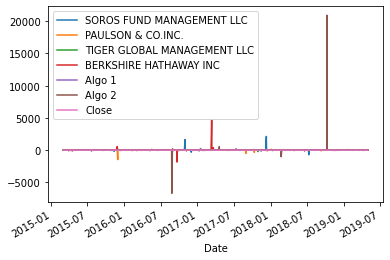

In [146]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_returns.rolling(21).std()


# Plot the rolling standard deviation

all_returns.plot()

### Calculate and plot the correlation

<AxesSubplot:>

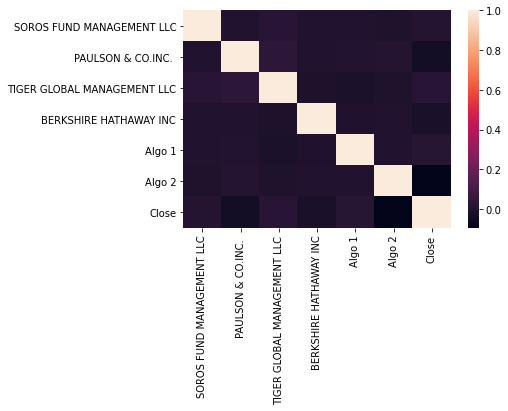

In [147]:
# Calculate the correlation

#Use the 'corr' function to calculate correlations for each stock pair

correlation = all_returns.corr()


# Display de correlation matrix

sns.heatmap(correlation)

In [148]:
whale_daily_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672
2015-03-11,-1.390912,-1.966750,-1.274177,-0.882260
2015-03-12,1.060018,0.989412,2.960622,-10.419761
2015-03-13,-1.302164,-1.139064,-1.281865,-1.753810


In [149]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [150]:
# Calculate covariance of a single portfolio

whale_covariance = whale_daily_returns["whale_daily_returns"].cov(sp_daily_returns["sp_daily_returns"])


KeyError: 'whale_daily_returns'

In [151]:
#Display coveriance of each stock

print(f"whale_covariance: {whale_covariance}")


NameError: name 'whale_covariance' is not defined

In [152]:

# Calculate variance of S&P TSX

variance = sp_daily_returns.var()

In [153]:

# Diplay S&P 500 variance
print(f"S&P 500 variance: {variance}")

S&P 500 variance: Close    0.000044
dtype: float64


In [154]:
# Computing beta


whale_beta = whale_covariance / variance

NameError: name 'whale_covariance' is not defined

In [155]:
algo_beta = algo_covariance / variance

NameError: name 'algo_covariance' is not defined

In [156]:
# Set the figure and plot the beta trends
Plot_FB = rolling_whale_beta.plot(figsize=(20, 10), title=
                               "Rolling 30-Day Beta of Social Media Stocks")

NameError: name 'rolling_whale_beta' is not defined

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [157]:
# Annualized Sharpe Ratios

#Example

# Calculate Sharpe Ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

# Display sharpe ratios
sharpe_ratios

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.700687
Algo 2                         0.275210
Close                          0.286526
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

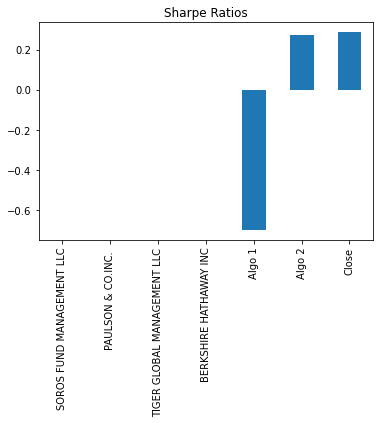

In [158]:
# Visualize the sharpe ratios as a bar plot

# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The algorithmic strategies do not outperform both the market and the whale portfolios. ---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [159]:
# Reading data from 1st stock

# Read the daily closing prices of FB, set the `date` as a datetime index
csv_data = Path("../Downloads/shop_historical.csv")
shop_df = pd.read_csv(csv_data, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [160]:
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [161]:
# Reading data from 2nd stock

# Read the daily closing prices of FB, set the `date` as a datetime index
csv_data = Path("../Downloads/otex_historical.csv")
otex_df = pd.read_csv(csv_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [162]:
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [163]:
# Reading data from 3rd stock

# Read the daily closing prices of FB, set the `date` as a datetime index
csv_data = Path("../Downloads/l_historical.csv")
L_df = pd.read_csv(csv_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [164]:
L_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [165]:
# Combine all stocks in a single DataFrame

combined_df = pd.concat([shop_df, otex_df, L_df], axis="columns", join="inner")

In [166]:
# Reset Date index

combined_df = combined_df.sort_index()

In [167]:
 combined_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [168]:
combined_df.head(10)

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
2018-01-09,SHOP,137.94,OTEX,42.13,L,57.37
2018-01-10,SHOP,139.29,OTEX,41.99,L,57.09
2018-01-11,SHOP,139.14,OTEX,42.29,L,56.78
2018-01-12,SHOP,140.76,OTEX,42.17,L,56.97


In [169]:
# Reorganize portfolio data by having a column per symbol

combined_df = combined_df.drop(columns=["Symbol", "Symbol", "Symbol"])

combined_df.head(2)



,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41


In [170]:
combined_df = combined_df.rename(columns={
    "L": "Shop", 
})

combined_df.head()

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [171]:
# Calculate daily returns

daily_returns = combined_df.pct_change()
daily_returns.head()

# Drop NAs

# Display sample data


,Close,Close,Close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753


In [172]:
# Drop nulls

combined_df.isnull().mean() * 100

combined_df = combined_df.dropna().copy()

combined_df.isnull().sum()

Close    0
Close    0
Close    0
dtype: int64

In [173]:
combined_df.head()

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [174]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = combined_df.dot(weights)
# Display sample data

portfolio_returns.head()

Date
2018-01-02    77.876667
2018-01-03    78.543333
2018-01-04    79.263333
2018-01-05    79.083333
2018-01-08    79.510000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [175]:
# Join your returns DataFrame to the original returns DataFrame

Both_returns = pd.concat([combined_df, portfolio_returns], axis ="columns", join="inner")

Both_returns




,Close,Close,Close,0
Date,,,,
2018-01-02,132.06,43.58,57.99,77.876667
2018-01-03,135.15,43.07,57.41,78.543333
2018-01-04,137.46,42.91,57.42,79.263333
2018-01-05,137.26,42.57,57.42,79.083333
2018-01-08,139.51,42.16,56.86,79.510000
...,...,...,...,...
2019-12-20,513.22,58.68,67.90,213.266667
2019-12-23,511.62,57.89,67.68,212.396667
2019-12-24,525.39,57.44,67.67,216.833333


In [176]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

# Drop nulls

Both_returns.isnull().mean() * 100

Both_returns = Both_returns.dropna().copy()

Both_returns.isnull().sum()

Close    0
Close    0
Close    0
0        0
dtype: int64

In [177]:
Both_returns.head()

,Close,Close,Close,0
Date,,,,
2018-01-02,132.06,43.58,57.99,77.876667
2018-01-03,135.15,43.07,57.41,78.543333
2018-01-04,137.46,42.91,57.42,79.263333
2018-01-05,137.26,42.57,57.42,79.083333
2018-01-08,139.51,42.16,56.86,79.510000


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


In [178]:
daily_std = Both_returns.std()
daily_std.head()

Close    117.175699
Close      4.552625
Close      6.494729
0         42.327911
dtype: float64

In [179]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Close    1860.106555
Close      72.270682
Close     103.100626
0         671.934757
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [180]:
# Calculate rolling standard deviation


Both_returns.rolling(21).std()


# Plot rolling standard deviation

Both_returns.rolling(21).std()

,Close,Close,Close,0
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-20,32.030897,0.853264,1.449143,10.298037
2019-12-23,29.696679,0.861196,1.597104,9.434923
2019-12-24,27.630205,0.836704,1.717774,8.696060


### Calculate and plot the correlation

In [182]:
# Calculate and plot the correlation

Both_covariance = Both_returns["Both_returns"].cov(all_returns["all_returns"])
print(f"Both_covariance: {Both_covariance}")



KeyError: 'Both_returns'

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [184]:
# Calculate and plot Beta

# Computing beta


Both_returns = Both_returns / variance


# Set the figure and plot the beta trends
Plot_Both_returns = rolling_Both_beta.plot(figsize=(20, 10), title=
                               "Rolling 60-Day Beta of Returns")

ValueError: cannot reindex from a duplicate axis

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [185]:
# Calculate Annualzied Sharpe Ratios

# Annualized Sharpe Ratios



# Calculate Sharpe Ratio
sharpe_ratios = (Both_returns.mean() * 252) / (Both_returns.std() * np.sqrt(252))
sharpe_ratios

# Display sharpe ratios
sharpe_ratios



Close     37.439396
Close    172.208435
Close    153.128206
0         48.553574
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

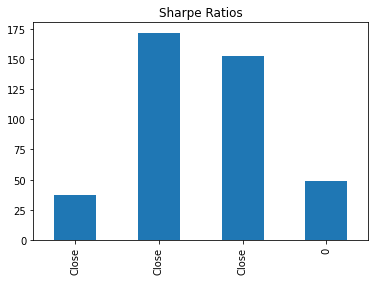

In [186]:
# Visualize the sharpe ratios as a bar plot

# Visualize the sharpe ratios as a bar plot

# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio does well as compared to the market. 